<a href="https://colab.research.google.com/github/wabinyai/AIRQO-web/blob/master/Compare_Metrologican_data_with_PM_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 21.9 MB/s 
     |████████████████████████████████| 6.3 MB 26.7 MB/s 
     |████████████████████████████████| 16.7 MB 374 kB/s 


In [4]:
pip install iteration_utilities

     |████████████████████████████████| 283 kB 26.1 MB/s 


In [103]:
import pandas as pd
import geopandas as gpd
import folium
import branca.colormap as cm
import matplotlib.pyplot as plt
from iteration_utilities import duplicates
from google.colab import files
from folium.plugins import FastMarkerCluster

sns.set_theme(style="darkgrid")


# DATA SET

In [6]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving TA00216.csv to TA00216.csv
User uploaded file "TA00216.csv" with length 5309214 bytes


In [41]:
fname = fn
df = pd.read_csv(fname)
df.head()

,timestamp (UTC),atmosphericpressure S000220 AVG (kPa),atmosphericpressure S001002 AVG (kPa),atmosphericpressure S001544 AVG (kPa),precipitation S000220 (mm),precipitation S001002 (mm),precipitation S001544 (mm),radiation S000220 AVG (W/m2),radiation S001002 AVG (W/m2),radiation S001544 AVG (W/m2),...,temperature S001544 MIN (degrees Celsius),winddirection S000220 (degrees),winddirection S001002 (degrees),winddirection S001544 (degrees),windgusts S000220 MAX (m/s),windgusts S001002 MAX (m/s),windgusts S001544 MAX (m/s),windspeed S000220 AVG (m/s),windspeed S001002 AVG (m/s),windspeed S001544 AVG (m/s)
0,2018-01-01 00:00,87.691667,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,...,NaN,203.788162,NaN,NaN,0.93,NaN,NaN,0.296667,NaN,NaN
1,2018-01-01 01:00,87.650833,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,...,NaN,214.239503,NaN,NaN,1.21,NaN,NaN,0.292500,NaN,NaN
2,2018-01-01 02:00,87.681667,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,...,NaN,143.470040,NaN,NaN,1.31,NaN,NaN,0.424167,NaN,NaN
3,2018-01-01 03:00,87.722500,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,...,NaN,321.622037,NaN,NaN,1.60,NaN,NaN,0.441667,NaN,NaN
4,2018-01-01 04:00,87.779167,NaN,NaN,0.0,NaN,NaN,29.666667,NaN,NaN,...,NaN,280.324638,NaN,NaN,1.56,NaN,NaN,0.647500,NaN,NaN


In [10]:
df.isna().sum()

timestamp (UTC)                                  0
atmosphericpressure S000220 AVG (kPa)        25079
atmosphericpressure S001002 AVG (kPa)        23020
atmosphericpressure S001544 AVG (kPa)        27968
precipitation S000220 (mm)                   25079
precipitation S001002 (mm)                   31151
precipitation S001544 (mm)                   27968
radiation S000220 AVG (W/m2)                 25079
radiation S001002 AVG (W/m2)                 23019
radiation S001544 AVG (W/m2)                 27968
relativehumidity S000220 AVG (-)             25594
relativehumidity S001002 AVG (-)             23034
relativehumidity S001544 AVG (-)             27970
temperature S000220 AVG (degrees Celsius)    25080
temperature S000220 MAX (degrees Celsius)    25080
temperature S000220 MIN (degrees Celsius)    25080
temperature S001002 AVG (degrees Celsius)    23035
temperature S001002 MAX (degrees Celsius)    23035
temperature S001002 MIN (degrees Celsius)    23035
temperature S001544 AVG (degree

# CONVERTING TO DATE TIME

In [44]:
# Conveting created_at from object to date time 
df['timestamp (UTC)'] = pd.to_datetime(df['timestamp (UTC)'], dayfirst=True)
df.rename(columns={'timestamp (UTC)':'Datetime'}, inplace=True)

# Deprecated uses of TimeGrouper
You can set the index to be 'Date_Time' and use pd.TimeGrouper

In [38]:
df.set_index('Datetime').groupby(pd.Grouper(freq='M')).mean()

,atmosphericpressure S000220 AVG (kPa),atmosphericpressure S001002 AVG (kPa),atmosphericpressure S001544 AVG (kPa),precipitation S000220 (mm),precipitation S001002 (mm),precipitation S001544 (mm),radiation S000220 AVG (W/m2),radiation S001002 AVG (W/m2),radiation S001544 AVG (W/m2),relativehumidity S000220 AVG (-),...,temperature S001544 MIN (degrees Celsius),winddirection S000220 (degrees),winddirection S001002 (degrees),winddirection S001544 (degrees),windgusts S000220 MAX (m/s),windgusts S001002 MAX (m/s),windgusts S001544 MAX (m/s),windspeed S000220 AVG (m/s),windspeed S001002 AVG (m/s),windspeed S001544 AVG (m/s)
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-31,87.582342,NaN,NaN,0.038079,NaN,NaN,154.863239,NaN,NaN,0.698082,...,NaN,157.569222,NaN,NaN,2.252923,NaN,NaN,0.898680,NaN,NaN
2018-02-28,87.472344,NaN,NaN,0.079714,NaN,NaN,164.920511,NaN,NaN,0.717175,...,NaN,167.164998,NaN,NaN,2.416893,NaN,NaN,0.810712,NaN,NaN
2018-03-31,87.634998,NaN,NaN,0.240235,NaN,NaN,135.076277,NaN,NaN,0.836986,...,NaN,190.101949,NaN,NaN,2.808040,NaN,NaN,1.178906,NaN,NaN
2018-04-30,87.688966,NaN,NaN,0.223131,NaN,NaN,120.929861,NaN,NaN,0.870421,...,NaN,181.353790,NaN,NaN,2.108336,NaN,NaN,0.759155,NaN,NaN
2018-05-31,87.735650,NaN,NaN,0.002993,NaN,NaN,124.928763,NaN,NaN,0.838397,...,NaN,178.693209,NaN,NaN,2.501012,NaN,NaN,0.742725,NaN,NaN
2018-06-30,87.857962,NaN,NaN,0.000283,NaN,NaN,118.641551,NaN,NaN,0.817962,...,NaN,174.329874,NaN,NaN,1.933278,NaN,NaN,0.674488,NaN,NaN
2018-07-31,87.877140,NaN,NaN,0.026740,NaN,NaN,168.127748,NaN,NaN,0.762427,...,NaN,131.417235,NaN,NaN,2.242923,NaN,NaN,0.760634,NaN,NaN
2018-08-31,87.841083,NaN,NaN,0.116673,NaN,NaN,150.826277,NaN,NaN,0.811238,...,NaN,122.899551,NaN,NaN,2.019173,NaN,NaN,0.741872,NaN,NaN
2018-09-30,87.650181,NaN,NaN,0.108140,NaN,NaN,167.375463,NaN,NaN,0.792124,...,NaN,144.407177,NaN,NaN,2.190687,NaN,NaN,0.758999,NaN,NaN


# Mean daily average 

In [36]:
df1=df.resample('D', on='Datetime').mean()
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1537 entries, 2018-01-01 to 2022-03-17
Freq: D
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   atmosphericpressure S000220 AVG (kPa)      492 non-null    float64
 1   atmosphericpressure S001002 AVG (kPa)      601 non-null    float64
 2   atmosphericpressure S001544 AVG (kPa)      388 non-null    float64
 3   precipitation S000220 (mm)                 492 non-null    float64
 4   precipitation S001002 (mm)                 241 non-null    float64
 5   precipitation S001544 (mm)                 388 non-null    float64
 6   radiation S000220 AVG (W/m2)               492 non-null    float64
 7   radiation S001002 AVG (W/m2)               598 non-null    float64
 8   radiation S001544 AVG (W/m2)               388 non-null    float64
 9   relativehumidity S000220 AVG (-)           492 non-null    float64
 10

# Mean montly 

In [21]:
df1=df.resample('M', on='Datetime').mean()

# Annual average

In [24]:
df1=df.resample('Y', on='Datetime').mean()

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2018-12-31 to 2022-12-31
Freq: A-DEC
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   atmosphericpressure S000220 AVG (kPa)      2 non-null      float64
 1   atmosphericpressure S001002 AVG (kPa)      3 non-null      float64
 2   atmosphericpressure S001544 AVG (kPa)      2 non-null      float64
 3   precipitation S000220 (mm)                 2 non-null      float64
 4   precipitation S001002 (mm)                 2 non-null      float64
 5   precipitation S001544 (mm)                 2 non-null      float64
 6   radiation S000220 AVG (W/m2)               2 non-null      float64
 7   radiation S001002 AVG (W/m2)               3 non-null      float64
 8   radiation S001544 AVG (W/m2)               2 non-null      float64
 9   relativehumidity S000220 AVG (-)           2 non-null      float64
 1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36869 entries, 0 to 36868
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Datetime                                   36869 non-null  datetime64[ns]
 1   atmosphericpressure S000220 AVG (kPa)      11790 non-null  float64       
 2   atmosphericpressure S001002 AVG (kPa)      13849 non-null  float64       
 3   atmosphericpressure S001544 AVG (kPa)      8901 non-null   float64       
 4   precipitation S000220 (mm)                 11790 non-null  float64       
 5   precipitation S001002 (mm)                 5718 non-null   float64       
 6   precipitation S001544 (mm)                 8901 non-null   float64       
 7   radiation S000220 AVG (W/m2)               11790 non-null  float64       
 8   radiation S001002 AVG (W/m2)               13850 non-null  float64       
 9   radiation S001544

# ATMOSPHRIC PRESSURE

In [40]:
df = df.groupby('Datetime')['atmosphericpressure S000220 AVG (kPa)'].mean().reset_index()
df

,Datetime,atmosphericpressure S000220 AVG (kPa)
0,2018-01-01 00:00:00,87.691667
1,2018-01-01 01:00:00,87.650833
2,2018-01-01 02:00:00,87.681667
3,2018-01-01 03:00:00,87.722500
4,2018-01-01 04:00:00,87.779167
...,...,...
36864,2022-03-17 00:00:00,NaN
36865,2022-03-17 01:00:00,NaN
36866,2022-03-17 02:00:00,NaN
36867,2022-03-17 03:00:00,NaN


# Daily average of atmosphericpressure S000220 AVG (kPa)

In [47]:
daily = df.set_index('Datetime').groupby(pd.Grouper(freq='D'))['atmosphericpressure S000220 AVG (kPa)'].mean()
monthly = daily.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlysH = monthly.dropna(axis=0)
print (monthlysH.head())
print (monthlysH.shape)

#monthlysH.to_csv('E:/RESEAERCH/FEEDS/ENTE/HUM1.csv')

Datetime
2018-01-01    87.637118
2018-01-02    87.589965
2018-01-03    87.592604
2018-01-04    87.710729
2018-01-05    87.569792
Freq: D, Name: atmosphericpressure S000220 AVG (kPa), dtype: float64
(492,)


# PM data

In [48]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving raw_Kla_data_NEW.csv to raw_Kla_data_NEW.csv
User uploaded file "raw_Kla_data_NEW.csv" with length 4007668 bytes


In [49]:
fname = fn
df_PM = pd.read_csv(fname)
df_PM.head()

,Unnamed: 0,datetime,latitude,longitude,pm2_5,Parish,Division
0,0,2020-02-15 20:00:00,0.314,32.59,18.39,Civic Centre,Kampala Central
1,1,2020-02-15 22:00:00,0.314,32.59,18.39,Civic Centre,Kampala Central
2,2,2020-02-15 23:00:00,0.314,32.59,18.39,Civic Centre,Kampala Central
3,3,2020-02-15 21:00:00,0.314,32.59,18.39,Civic Centre,Kampala Central
4,4,2020-02-01 05:00:00,0.314,32.59,21.43,Civic Centre,Kampala Central


In [63]:
# Conveting created_at from object to date time 
df_PM['datetime'] = pd.to_datetime(df_PM['datetime'], dayfirst=True)
df_PM.rename(columns={'datetime':'Datetime'}, inplace=True)

In [64]:
df_PM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52007 entries, 0 to 52006
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  52007 non-null  int64         
 1   Datetime    52007 non-null  datetime64[ns]
 2   latitude    52007 non-null  float64       
 3   longitude   52007 non-null  float64       
 4   pm2_5       52007 non-null  float64       
 5   Parish      52007 non-null  object        
 6   Division    52007 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 2.8+ MB


In [65]:
df_PM.head()

,Unnamed: 0,Datetime,latitude,longitude,pm2_5,Parish,Division
0,0,2020-02-15 20:00:00,0.314,32.59,18.39,Civic Centre,Kampala Central
1,1,2020-02-15 22:00:00,0.314,32.59,18.39,Civic Centre,Kampala Central
2,2,2020-02-15 23:00:00,0.314,32.59,18.39,Civic Centre,Kampala Central
3,3,2020-02-15 21:00:00,0.314,32.59,18.39,Civic Centre,Kampala Central
4,4,2020-02-01 05:00:00,0.314,32.59,21.43,Civic Centre,Kampala Central


In [67]:
daily_PM = df_PM.set_index('Datetime').groupby(pd.Grouper(freq='D'))['pm2_5'].mean()
monthly_PM = daily_PM.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlysH_PM = monthly_PM.dropna(axis=0)
print (monthlysH_PM.head())
print (monthlysH_PM.shape)

#monthlysH.to_csv('E:/RESEAERCH/FEEDS/ENTE/HUM1.csv')

Datetime
2019-02-15    46.05000
2019-02-16    46.05000
2019-02-17    46.05000
2019-02-18    54.09375
2019-02-19    67.50000
Name: pm2_5, dtype: float64
(930,)


# MERGE ON DATETIME

In [69]:
result = pd.merge(monthlysH, monthlysH_PM, on="Datetime")

In [71]:
result.rename(columns={'atmosphericpressure S000220 AVG (kPa)':'Atmosphericpressure'}, inplace=True)

In [72]:
result.head()

,Atmosphericpressure,pm2_5
Datetime,,
2019-02-15,87.795036,46.05000
2019-02-16,87.796597,46.05000
2019-02-17,87.736076,46.05000
2019-02-18,87.642535,54.09375
2019-02-19,87.571042,67.50000


In [73]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2019-02-15 to 2019-05-07
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Atmosphericpressure  65 non-null     float64
 1   pm2_5                65 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


In [75]:
result.corr()

,Atmosphericpressure,pm2_5
Atmosphericpressure,1.000000,-0.113335
pm2_5,-0.113335,1.000000


# WINDSPEED

In [91]:

daily = df.set_index('Datetime').groupby(pd.Grouper(freq='D'))['relativehumidity S000220 AVG (-)'].mean()
monthly_w = daily.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlysH_w = monthly_w.dropna(axis=0)
print (monthlysH_w.head())
print (monthlysH_w.shape)

#monthlysH.to_csv('E:/RESEAERCH/FEEDS/ENTE/HUM1.csv')

Datetime
2018-01-01    0.811372
2018-01-02    0.843818
2018-01-03    0.634226
2018-01-04    0.709889
2018-01-05    0.619017
Freq: D, Name: relativehumidity S000220 AVG (-), dtype: float64
(492,)


# Merge windspeed vs PM 2.5

In [92]:
result_w = pd.merge(monthlysH_w, monthlysH_PM, on="Datetime")
result_w

,relativehumidity S000220 AVG (-),pm2_5
Datetime,,
2019-02-15,0.686220,46.050000
2019-02-16,0.654135,46.050000
2019-02-17,0.748267,46.050000
2019-02-18,0.663604,54.093750
2019-02-19,0.625097,67.500000
...,...,...
2019-05-03,0.814750,57.012083
2019-05-04,0.779014,55.410000
2019-05-05,0.809660,39.025000


In [93]:
result_w.corr()

,relativehumidity S000220 AVG (-),pm2_5
relativehumidity S000220 AVG (-),1.000000,-0.393215
pm2_5,-0.393215,1.000000


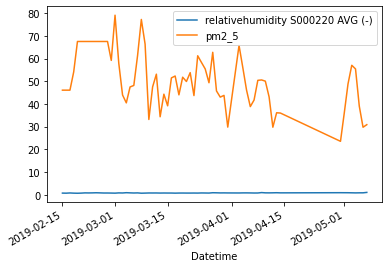

In [94]:
result_w.plot()

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

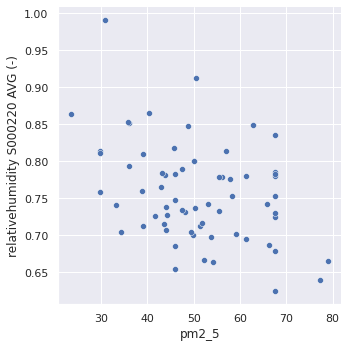

In [104]:
# line plot with x and y values defined
sns.relplot(x='pm2_5', y='relativehumidity S000220 AVG (-)', data=result_w);


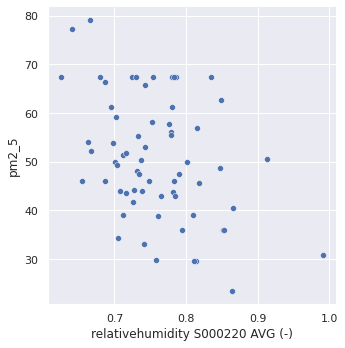

In [107]:
# line plot with x and y values defined
sns.relplot( x='relativehumidity S000220 AVG (-)',y='pm2_5', data=result_w);


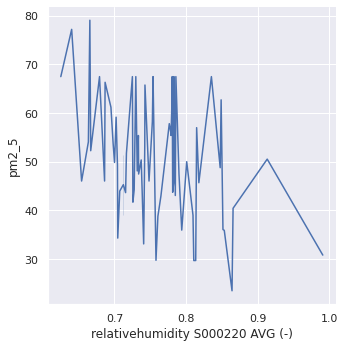

In [105]:
# line plot with x and y values defined
sns.relplot(x='relativehumidity S000220 AVG (-)', y='pm2_5',kind="line", data=result_w);

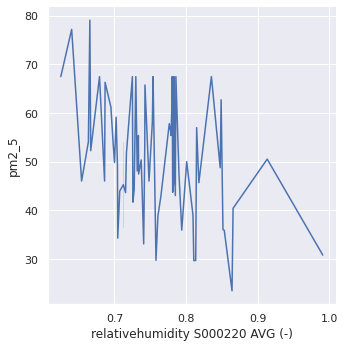

In [106]:
#sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);
sns.relplot(x='relativehumidity S000220 AVG (-)', y='pm2_5', ci="sd", kind="line", data=result_w);

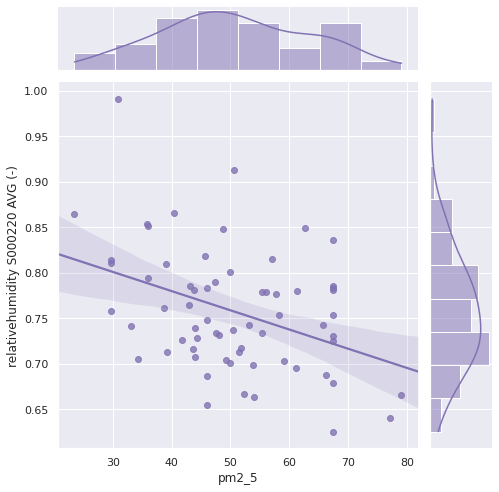

In [110]:
sns.set_theme(style="darkgrid")

#tips = sns.load_dataset("tips")
g = sns.jointplot(x="pm2_5", y="relativehumidity S000220 AVG (-)", data=result_w,
                  kind="reg", truncate=False,
 #                 xlim=(0, 100), ylim=(0, 1.2),
                  color="m", height=7)

# RADIATION  VS PM2.5

In [111]:

daily = df.set_index('Datetime').groupby(pd.Grouper(freq='D'))['relativehumidity S001002 AVG (-)','windgusts S001002 MAX (m/s)','temperature S001002 MAX (degrees Celsius)'].mean()
monthly_w_R = daily.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlysH_w_R = monthly_w_R.dropna(axis=0)
print (monthlysH_w_R.head())
print (monthlysH_w_R.shape)

#monthlysH.to_csv('E:/RESEAERCH/FEEDS/ENTE/HUM1.csv')

            relativehumidity S001002 AVG (-)  windgusts S001002 MAX (m/s)  \
Datetime                                                                    
2019-05-07                          0.827417                     2.668000   
2019-05-08                          0.856031                     2.096667   
2019-05-09                          0.822896                     2.016667   
2019-05-10                          0.835493                     2.202083   
2019-05-11                          0.900007                     2.109167   

            temperature S001002 MAX (degrees Celsius)  
Datetime                                               
2019-05-07                                  23.933333  
2019-05-08                                  21.633333  
2019-05-09                                  23.116667  
2019-05-10                                  23.741667  
2019-05-11                                  21.800000  
(601, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


# Merge

In [112]:
result_w = pd.merge(monthlysH_w_R, monthlysH_PM, on="Datetime")
result_w

,relativehumidity S001002 AVG (-),windgusts S001002 MAX (m/s),temperature S001002 MAX (degrees Celsius),pm2_5
Datetime,,,,
2019-05-07,0.827417,2.668000,23.933333,30.835417
2019-05-08,0.856031,2.096667,21.633333,39.214583
2019-05-09,0.822896,2.016667,23.116667,41.700417
2019-05-10,0.835493,2.202083,23.741667,38.899583
2019-05-11,0.900007,2.109167,21.800000,36.175833
...,...,...,...,...
2021-01-27,0.811795,2.133750,23.420833,52.010000
2021-01-28,0.777399,2.140833,23.750000,52.010000
2021-01-29,0.716395,1.890000,23.766667,52.010000


In [ ]:
sns.set_theme(style="darkgrid")

#tips = sns.load_dataset("tips")
g = sns.jointplot(x="pm2_5", y="relativehumidity S000220 AVG (-)", data=result_w,
                  kind="reg", truncate=False,
 #                 xlim=(0, 100), ylim=(0, 1.2),
                  color="m", height=7)

In [113]:
result_w.corr()

,relativehumidity S001002 AVG (-),windgusts S001002 MAX (m/s),temperature S001002 MAX (degrees Celsius),pm2_5
relativehumidity S001002 AVG (-),1.000000,-0.251069,-0.676520,0.046772
windgusts S001002 MAX (m/s),-0.251069,1.000000,0.197339,-0.085440
temperature S001002 MAX (degrees Celsius),-0.676520,0.197339,1.000000,-0.162123
pm2_5,0.046772,-0.085440,-0.162123,1.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36869 entries, 0 to 36868
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Datetime                                   36869 non-null  datetime64[ns]
 1   atmosphericpressure S000220 AVG (kPa)      11790 non-null  float64       
 2   atmosphericpressure S001002 AVG (kPa)      13849 non-null  float64       
 3   atmosphericpressure S001544 AVG (kPa)      8901 non-null   float64       
 4   precipitation S000220 (mm)                 11790 non-null  float64       
 5   precipitation S001002 (mm)                 5718 non-null   float64       
 6   precipitation S001544 (mm)                 8901 non-null   float64       
 7   radiation S000220 AVG (W/m2)               11790 non-null  float64       
 8   radiation S001002 AVG (W/m2)               13850 non-null  float64       
 9   radiation S001544